In [ ]:
#Разделение папки Zoo на train, valid, test
# import os
# import random
# import shutil

# # Путь к текущим данным
# source_dir = '/home/andrey/Downloads/face_or_animal/data/zoo'  # Текущая папка с животными
# # Путь для новой структуры
# dest_dir = '/home/andrey/Downloads/face_or_animal/data/zoo_split'  # Папка для разделения данных
# # Пропорции разделения
# split_ratios = {'train': 0.7, 'valid': 0.15, 'test': 0.15}

# # Классы животных
# classes = ['buffalo', 'elephant', 'rhino', 'zebra']

# # Создание папок для train, valid, test
# for split in split_ratios:
#     for cls in classes:
#         os.makedirs(os.path.join(dest_dir, split, cls), exist_ok=True)

# # Разделение данных по классам
# for cls in classes:
#     # Получаем список всех файлов в папке класса
#     files = os.listdir(os.path.join(source_dir, cls))
    
#     # Изображения
#     images = [f for f in files if f.endswith('.jpg')]
    
#     # Перемешиваем файлы случайным образом
#     random.shuffle(images)
    
#     # Определяем количество файлов для каждого набора
#     train_count = int(len(images) * split_ratios['train'])
#     valid_count = int(len(images) * split_ratios['valid'])
    
#     # Перемещаем файлы в соответствующие папки
#     for i, img_file in enumerate(images):
#         label_file = img_file.replace('.jpg', '.txt')  # Файл разметки
        
#         if i < train_count:
#             split = 'train'
#         elif i < train_count + valid_count:
#             split = 'valid'
#         else:
#             split = 'test'
        
#         # Перемещаем изображение и разметку
#         shutil.move(os.path.join(source_dir, cls, img_file), os.path.join(dest_dir, split, cls, img_file))
#         shutil.move(os.path.join(source_dir, cls, label_file), os.path.join(dest_dir, split, cls, label_file))

# print("Данные успешно распределены!")


In [1]:
import os
from ultralytics import YOLO
from PIL import Image as PILImage
from IPython.display import display

WARNING ⚠️ Python>=3.10 is required, but Python==3.9.20 is currently installed 


In [2]:
# Путь к data.yaml
data_path = '/home/andrey/Downloads/face_or_animal/data.yaml'

# Загрузка предобученной модели YOLOv8 (можешь выбрать более тяжёлую модель)
model = YOLO('yolov8m.pt')  # YOLOv8m или можешь выбрать 'yolov8l.pt'

# Обучение модели с явным указанием использования CUDA (GPU)
model.train(data=data_path, epochs=100, device='cuda')  # Явное указание на использование CUDA

100%|██████████| 49.7M/49.7M [00:01<00:00, 36.0MB/s]


New https://pypi.org/project/ultralytics/8.3.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.13 🚀 Python-3.9.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 7966MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/andrey/Downloads/face_or_animal/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

train: Scanning /home/andrey/Downloads/face_or_animal/data/zoo_split/train/buffalo.cache... 1049 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1049/1049 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/andrey/Downloads/face_or_animal/data/zoo_split/train/buffalo/054.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/andrey/Downloads/face_or_animal/data/zoo_split/train/rhino/033.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/andrey/Downloads/face_or_animal/data/zoo_split/train/rhino/037.jpg: corrupt JPEG restored and saved



val: Scanning /home/andrey/Downloads/face_or_animal/data/zoo_split/valid/buffalo.cache... 224 images, 0 backgrounds, 0 corrupt: 100%|██████████| 224/224 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 83 weight(decay=0.0), 90 weight(decay=0.0005), 89 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.87G     0.7757      1.933       1.21         39        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.71it/s]

                   all        224        388          1     0.0495      0.655      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.12G     0.9627      1.504      1.322         43        640: 100%|██████████| 66/66 [00:26<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        224        388        0.5      0.461      0.442      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.04G      1.068       1.52      1.396         51        640: 100%|██████████| 66/66 [00:26<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        224        388      0.556      0.451      0.477      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.12G      1.053      1.447      1.386         33        640: 100%|██████████| 66/66 [00:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        224        388       0.56      0.502      0.522      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       7.1G       1.05      1.342      1.377         34        640: 100%|██████████| 66/66 [00:26<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        224        388       0.81       0.71      0.803      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.16G     0.9987      1.206      1.336         33        640: 100%|██████████| 66/66 [00:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        224        388      0.784      0.817      0.861      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.12G     0.9772      1.172      1.327         32        640: 100%|██████████| 66/66 [00:26<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        224        388      0.796      0.733      0.812      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.14G     0.9529      1.094      1.314         45        640: 100%|██████████| 66/66 [00:26<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]

                   all        224        388      0.795      0.801      0.868       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.14G     0.9471       1.02      1.292         27        640: 100%|██████████| 66/66 [00:26<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        224        388       0.82      0.722      0.815      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.15G     0.9069     0.9901      1.285         36        640: 100%|██████████| 66/66 [00:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        224        388      0.822      0.799      0.876       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.14G     0.8799     0.9504       1.26         29        640: 100%|██████████| 66/66 [00:26<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        224        388      0.887      0.807      0.899      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.13G     0.8828     0.9189      1.269         25        640: 100%|██████████| 66/66 [00:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        224        388      0.899      0.836      0.911      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.13G      0.878     0.9331      1.252         40        640: 100%|██████████| 66/66 [00:26<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]

                   all        224        388       0.84      0.761      0.883      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.15G     0.8347      0.845      1.219         55        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        224        388      0.901      0.836      0.914      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.11G     0.8295     0.8481      1.222         46        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        224        388      0.847      0.862      0.924      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.16G      0.828     0.8337      1.219         37        640: 100%|██████████| 66/66 [00:26<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.869      0.839      0.917      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.13G     0.8177     0.8134      1.202         48        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        224        388      0.845      0.841      0.916      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.12G     0.7971     0.7759      1.207         41        640: 100%|██████████| 66/66 [00:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        224        388      0.907      0.855      0.948      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.11G     0.7785     0.7639      1.193         53        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.937      0.863      0.939      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.16G     0.7788     0.7651      1.185         34        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]

                   all        224        388      0.922      0.875      0.949      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.11G     0.7295     0.7162       1.16         35        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        224        388      0.902       0.88      0.943      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.13G     0.7369     0.7015      1.165         30        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        224        388      0.908      0.882      0.944      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.15G     0.7398     0.6914      1.164         35        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.897      0.897      0.952      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.11G     0.7291     0.7049      1.168         29        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        224        388      0.907      0.887       0.94      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.13G      0.696     0.6755       1.14         28        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.896      0.894      0.956      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.14G     0.7231     0.6865      1.158         39        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.878      0.874      0.921      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.14G     0.7048     0.6626      1.142         35        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        224        388      0.907      0.869      0.941      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.12G        0.7     0.6315      1.139         42        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        224        388      0.926      0.901       0.95      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.12G     0.7077     0.6716      1.144         30        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        224        388      0.936      0.896      0.947      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.12G     0.6909     0.6341      1.142         42        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        224        388      0.935      0.888      0.951      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.12G     0.6805     0.6357      1.125         38        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.933      0.887      0.957      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.12G     0.6659     0.5999      1.112         32        640: 100%|██████████| 66/66 [00:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        224        388      0.955       0.82      0.932      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.13G     0.6572     0.6039      1.107         52        640: 100%|██████████| 66/66 [00:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        224        388      0.938      0.909       0.96       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.14G     0.6489     0.5712      1.107         38        640: 100%|██████████| 66/66 [00:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        224        388      0.933      0.903      0.955      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.15G     0.6627     0.5991      1.114         39        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        224        388      0.943      0.896       0.96      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.16G     0.6505     0.5726      1.103         27        640: 100%|██████████| 66/66 [00:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.922      0.927      0.966      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.13G     0.6332     0.5651      1.102         44        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        224        388      0.952      0.906      0.962       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.13G     0.6425     0.5647      1.096         63        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]

                   all        224        388      0.953      0.902      0.963      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.12G     0.6246      0.542      1.078         44        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        224        388       0.96        0.9      0.964      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       7.1G     0.6267     0.5422      1.089         41        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        224        388      0.932      0.934      0.971      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.12G     0.6305     0.5481       1.09         34        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.953      0.918      0.966      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.16G     0.6166     0.5276       1.08         32        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.942      0.879      0.958      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.12G     0.6099     0.5165      1.076         44        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        224        388      0.959      0.917      0.967       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.13G     0.6119     0.5195      1.085         30        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]

                   all        224        388      0.935      0.927      0.972      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.15G     0.6123     0.5267       1.08         37        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        224        388      0.954      0.894       0.97      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.11G     0.6128     0.5235       1.08         55        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        224        388      0.912      0.932      0.971      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.16G     0.5863     0.4926      1.064         33        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.938      0.924      0.966      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.14G     0.6046      0.531       1.08         40        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        224        388      0.903       0.92       0.96      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.15G     0.5716     0.4854       1.05         36        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        224        388      0.959      0.909      0.966       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.16G      0.574     0.4984      1.055         30        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.953      0.938      0.969      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.13G     0.5801     0.4963      1.061         39        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        224        388      0.927      0.946       0.97      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.12G     0.5657     0.4829      1.053         39        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        224        388      0.957       0.92      0.969      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.13G     0.5686     0.4651       1.05         26        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.933      0.947      0.972      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.15G       0.56       0.47      1.059         38        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        224        388      0.955      0.939      0.974      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.14G     0.5747     0.4779      1.053         43        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        224        388      0.974      0.905      0.966      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.11G     0.5329     0.4398      1.034         55        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        224        388      0.956      0.921      0.971      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.13G     0.5388     0.4474      1.028         39        640: 100%|██████████| 66/66 [00:26<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        224        388      0.958      0.924       0.97      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.14G     0.5494     0.4396      1.046         25        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        224        388      0.942      0.927      0.961      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.11G     0.5411      0.429      1.039         54        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.932      0.941      0.964      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.16G     0.5447     0.4467      1.042         29        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        224        388      0.943      0.941      0.972      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.11G     0.5326     0.4346      1.031         60        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.952      0.942      0.971      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.14G     0.5291      0.418      1.029         44        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        224        388      0.964      0.935      0.975      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.13G     0.5327     0.4323      1.036         31        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        224        388      0.965      0.939      0.974      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.13G     0.5174     0.4155      1.019         41        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        224        388      0.951      0.935      0.979      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.15G     0.5301     0.4258      1.028         39        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.968      0.878      0.972      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.13G     0.5067     0.4125      1.028         29        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        224        388      0.954      0.942      0.973      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.11G     0.5183     0.4224      1.036         27        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.964      0.926      0.969       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.16G     0.5139     0.4063      1.019         31        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        224        388      0.941      0.925      0.969       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.12G     0.5195     0.4242      1.027         31        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.945      0.939       0.97      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.15G      0.494      0.408      1.011         46        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        224        388      0.953      0.929      0.971      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.13G     0.4971     0.3923      1.014         49        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.957      0.923      0.974      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.13G     0.4944     0.3875      1.015         39        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]

                   all        224        388      0.949       0.93      0.972      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.14G     0.4976     0.3834      1.016         42        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        224        388      0.938      0.935       0.97      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.13G     0.4852     0.3801      1.006         39        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.952       0.92      0.969      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.13G     0.4757     0.3781     0.9999         32        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        224        388      0.951      0.941      0.978      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.15G     0.4776      0.365     0.9981         31        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.961      0.924      0.972       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.13G     0.4711     0.3718      1.003         35        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        224        388      0.963      0.933      0.974      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.13G     0.4647     0.3587     0.9943         38        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        224        388      0.945      0.939      0.967      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.12G     0.4602     0.3623     0.9876         47        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        224        388      0.954      0.928      0.973      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.13G     0.4614      0.358     0.9878         48        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        224        388      0.933      0.955      0.978      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.16G     0.4476     0.3505     0.9825         38        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        224        388      0.951      0.938      0.971      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.14G     0.4579     0.3527     0.9874         43        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.952      0.926      0.969      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.12G     0.4626     0.3545      1.003         29        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        224        388      0.956      0.942      0.973      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.14G     0.4441     0.3353     0.9846         27        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        224        388      0.964      0.963       0.98      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.14G     0.4355     0.3356     0.9838         38        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        224        388       0.97      0.935      0.975      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.12G     0.4499     0.3498     0.9915         31        640: 100%|██████████| 66/66 [00:26<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        224        388      0.954      0.949      0.977      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.13G     0.4343     0.3428     0.9807         23        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        224        388      0.946       0.95      0.973      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.12G     0.4285      0.327     0.9779         30        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        224        388       0.95      0.946      0.974      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.14G     0.4315     0.3337     0.9783         34        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        224        388      0.948      0.947      0.976      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.15G     0.4217     0.3269       0.97         28        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        224        388      0.936      0.954      0.979       0.83


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.11G     0.3306     0.2357     0.8821         16        640: 100%|██████████| 66/66 [00:27<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        224        388      0.948       0.92      0.967      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.12G     0.3194     0.2095     0.8728         13        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        224        388      0.961      0.935      0.978      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.11G     0.3137     0.2134     0.8736         15        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        224        388      0.932      0.961       0.98      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.11G     0.3011     0.2027     0.8625         13        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        224        388      0.955       0.93       0.98      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.11G     0.2977     0.1976     0.8591         10        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        224        388      0.953      0.937      0.979       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.11G     0.2958     0.1986     0.8579         15        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        224        388      0.941      0.952      0.977      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       7.1G     0.2964     0.1974     0.8662         15        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        224        388      0.964      0.943      0.982      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.12G     0.2837     0.1934     0.8485         12        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.956       0.93      0.979      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.11G     0.2871     0.1911     0.8509         15        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        224        388      0.963      0.919      0.979      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.12G     0.2815     0.1879     0.8456         19        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        224        388      0.938      0.948      0.978       0.84



100 epochs completed in 0.819 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 46.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 46.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.9.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 7966MiB)
Model summary (fused): 236 layers, 23,205,148 parameters, 0 gradients, 67.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]


                   all        224        388      0.964      0.943      0.982      0.843
               buffalo         56         85      0.942       0.96      0.987      0.863
              elephant         58         97      0.989       0.93      0.978      0.828
                 rhino         55         93      0.967      0.943      0.988      0.881
                 zebra         56        113       0.96      0.938      0.974      0.797
Speed: 0.1ms preprocess, 5.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb3f81b5ca0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [3]:
# Сохранение модели
model.save('yolov8_animals.pt')


image 1/1 /home/andrey/Downloads/face_or_animal/data/zoo_split/test/buffalo/024.jpg: 448x640 1 buffalo, 16.2ms
Speed: 1.4ms preprocess, 16.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5

image 1/1 /home/andrey/Downloads/face_or_animal/data/zoo_split/test/elephant/075.jpg: 416x640 1 elephant, 35.7ms
Speed: 1.2ms preprocess, 35.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict5

image 1/1 /home/andrey/Downloads/face_or_animal/data/zoo_split/test/rhino/044.jpg: 448x640 1 rhino, 16.0ms
Speed: 1.4ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5

image 1/1 /home/andrey/Downloads/face_or_animal/data/zoo_split/test/zebra/048.jpg: 480x640 3 zebras, 16.4ms
Speed: 1.3ms preprocess, 16.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5


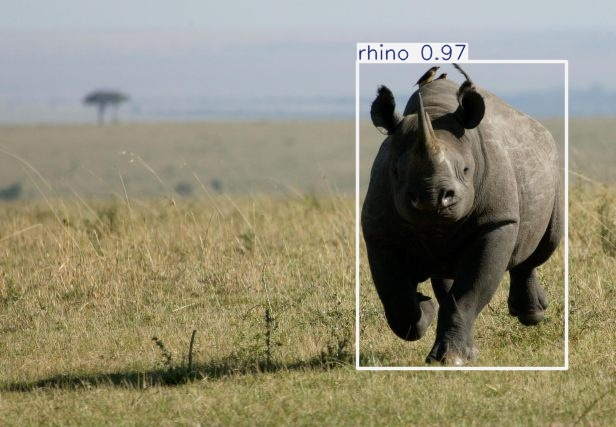

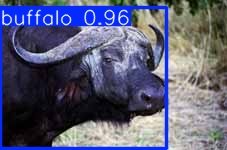

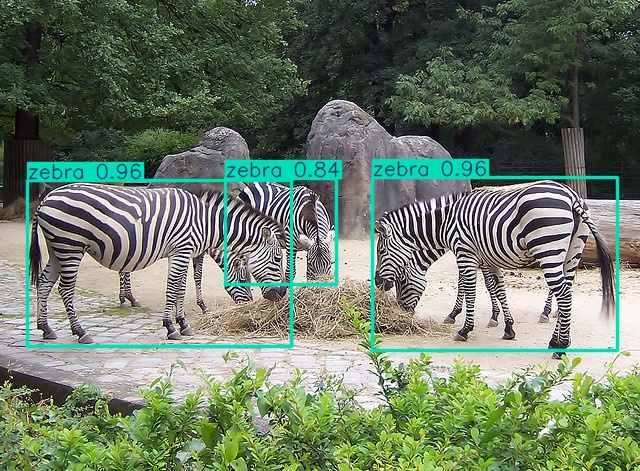

In [8]:
# Загрузка обученной модели
model = YOLO('/home/andrey/Downloads/face_or_animal/notebooks/runs/detect/train/weights/best.pt')

# Пути к изображениям для каждого класса
buffalo_image = '/home/andrey/Downloads/face_or_animal/data/zoo_split/test/buffalo/024.jpg'
elephant_image = '/home/andrey/Downloads/face_or_animal/data/zoo_split/test/elephant/075.jpg'
rhino_image = '/home/andrey/Downloads/face_or_animal/data/zoo_split/test/rhino/044.jpg'
zebra_image = '/home/andrey/Downloads/face_or_animal/data/zoo_split/test/zebra/048.jpg'

# Выполнение инференса для каждого изображения
results_buffalo = model.predict(source=buffalo_image, save=True)
results_elephant = model.predict(source=elephant_image, save=True)
results_rhino = model.predict(source=rhino_image, save=True)
results_zebra = model.predict(source=zebra_image, save=True)

# Путь, куда сохраняются результаты
output_dir = 'runs/detect/predict4/'  # Указание правильной папки для сохранённых изображений
result_images = os.listdir(output_dir)  # Список всех сохранённых файлов с результатами

# Проверка и отображение всех изображений
for img_name in result_images:
    img_path = os.path.join(output_dir, img_name)
    img = PILImage.open(img_path)
    display(img)